In [1]:
import util
import wave
import numpy as np
import matplotlib.pyplot as plt
import pywt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

# Plot four types of ECG

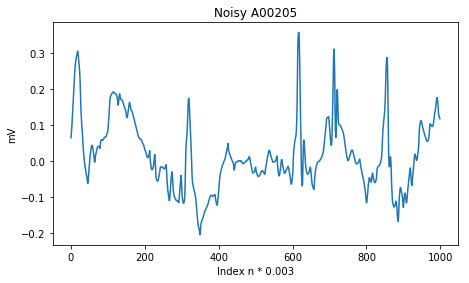

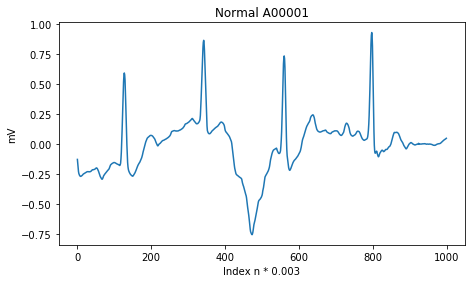

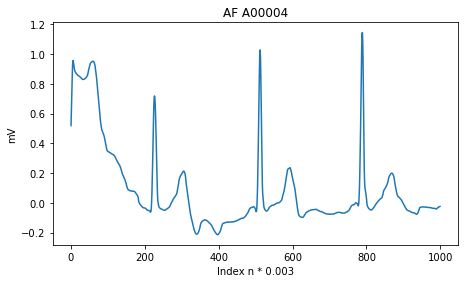

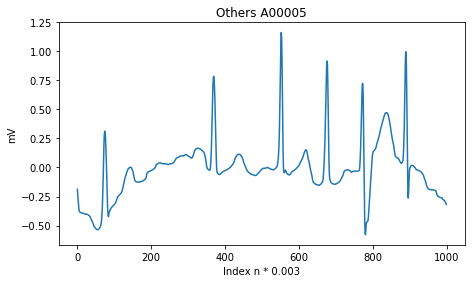

In [2]:
## Load data and plot
#Normal A00001
ecg_n1 = util.load('A00001')
ecg_n1s = ecg_n1[0:1000]
#others A00005
ecg_o1 = util.load('A00005')
ecg_o1s = ecg_o1[0:1000]
#AF A00004
ecg_a1 = util.load('A00004')
ecg_a1s = ecg_a1[0:1000]
#Noisy A00205
ecg_ns1 = util.load('A00205')
ecg_ns1s = ecg_ns1[0:1000]

##Plot the data
plt.subplot(2,2,1)
wave.plotWave(ecg_ns1s, 'Noisy A00205', 'Index n * 0.003')
plt.subplot(2,2,2)
wave.plotWave(ecg_n1s, 'Normal A00001', 'Index n * 0.003')
plt.subplot(2,2,3)
wave.plotWave(ecg_a1s, 'AF A00004', 'Index n * 0.003')
plt.subplot(2,2,4)
wave.plotWave(ecg_o1s, 'Others A00005', 'Index n * 0.003')


# Explore wavelets on noisy ECG

In [3]:
#print the type of wavelets:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [4]:
pywt.wavelist('sym')

['sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',
 'sym14',
 'sym15',
 'sym16',
 'sym17',
 'sym18',
 'sym19',
 'sym20']

In [5]:
#check the maximum level of the target ECG
w = pywt.Wavelet('sym4')
pywt.dwt_max_level(data_len = len(ecg_ns1), filter_len = w.dec_len)

10

In [6]:
#check the length of the coefficient, mode='symmetric'
pywt.dwt_coeff_len(data_len = len(ecg_ns1), filter_len = w.dec_len, mode='symmetric')

4503

In [7]:
coeff_ns = pywt.wavedecn(ecg_ns1, 'sym4', mode='symmetric', level=5)
print (coeff_ns)

[array([  3.67687084e-01,   3.13105256e-01,   1.06938517e+00,
         2.95163687e-01,   1.13953915e-01,   6.88495169e-01,
         9.92447776e-01,   7.31092901e-01,   2.38572318e-01,
        -8.56304992e-02,  -3.00050081e-01,  -4.48064182e-01,
         2.45409063e-02,  -9.44383755e-01,  -5.20436819e-01,
         3.34836353e-02,  -1.94950899e-02,  -6.22541310e-02,
        -1.45715320e-01,   2.87987052e-02,  -2.37660051e-01,
         6.32973700e-01,  -2.24664842e-01,   8.95156355e-02,
         8.12902154e-01,   3.32944911e-01,  -1.23145506e-03,
        -4.45622003e-01,   3.29356969e-01,  -1.31980918e-01,
        -6.36041985e-01,   7.09703605e-02,   4.73121385e-01,
         7.13737961e-01,   6.93770912e-01,   1.03426532e+00,
         8.28661450e-01,   5.25596030e-01,   2.62579575e-01,
         1.01370499e+00,  -4.64688726e-02,  -4.69603605e-01,
         1.79933745e-01,   2.91932529e-01,   4.30323884e-02,
        -3.16224846e-01,  -3.86503579e-01,  -7.50740288e-01,
         1.86013683e-01

In [8]:
#Set A1=0, D1=0,
coeff_ns[0].fill(0)
coeff_ns[1]['d'].fill(0)
#coeff_ns[2]['d'].fill(0)
#coeff_ns[3]['d'].fill(0)
#coeff_ns[4]['d'].fill(0)

In [9]:
rebuilt_ns = pywt.waverecn(coeff_ns, 'sym4')

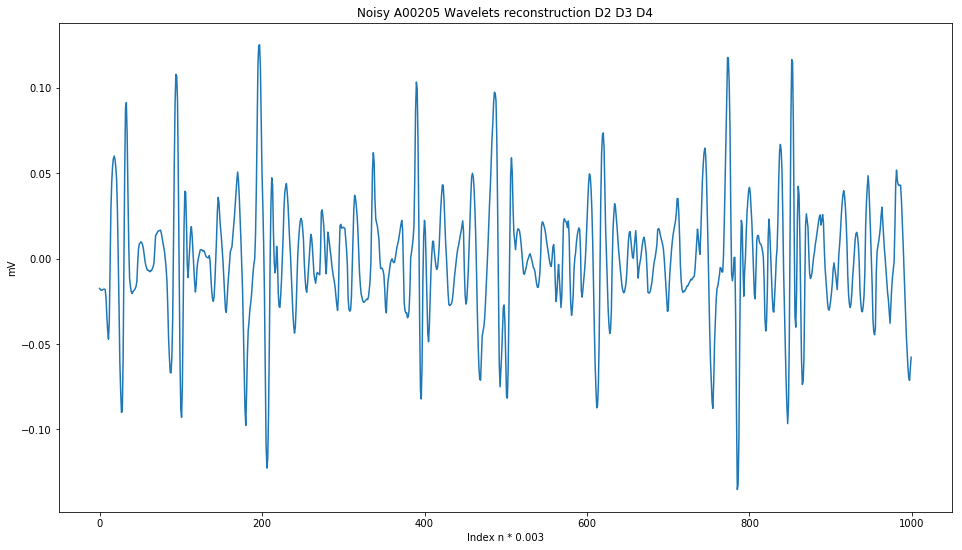

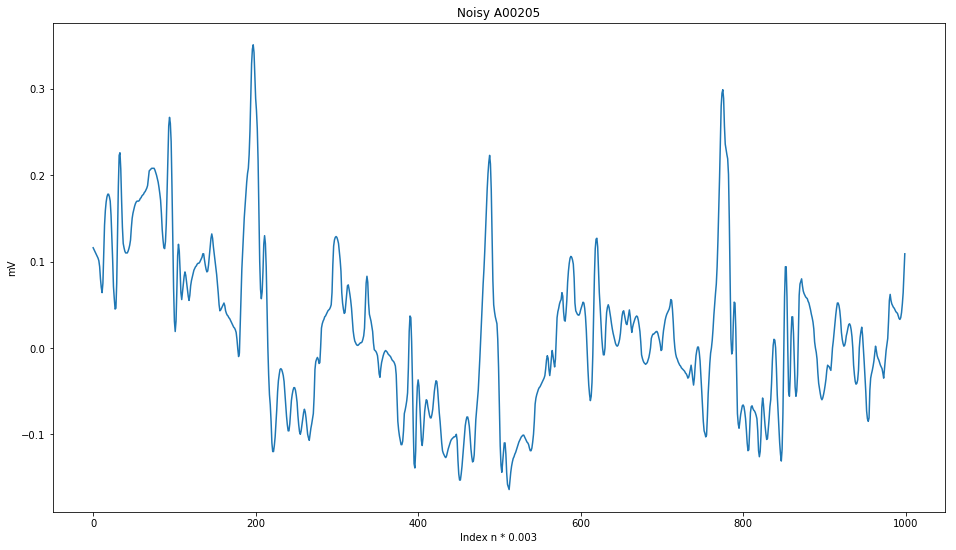

In [10]:
#plot reconstructed signal
wave.plotWave(rebuilt_ns[1000:2000], 'Noisy A00205 Wavelets reconstruction D2 D3 D4', 'Index n * 0.003')
#plot original signal
wave.plotWave(ecg_ns1[1000:2000], 'Noisy A00205', 'Index n * 0.003')

# Explore wavelet on Normal ECG

In [11]:
#wavelet decon on a Normal EKG
coeff_n = pywt.wavedecn(ecg_n1, 'sym4', mode='symmetric', level=5)
print (coeff_n)

[array([ -8.72234893e-01,  -8.12184825e-01,  -1.21523887e+00,
        -1.25593680e+00,  -1.44936210e+00,  -7.45636080e-01,
         1.76968898e-01,  -1.16687741e+00,   3.03304341e-01,
         7.64150357e-02,   5.37538019e-01,   7.86194485e-01,
         1.80292297e+00,   1.36352574e+00,   9.98564211e-01,
        -3.19748526e-01,  -2.52956232e+00,  -3.37028432e+00,
        -1.27087319e+00,   7.52807129e-01,  -6.57359576e-01,
         4.24627638e-01,   9.44426096e-01,   5.36010431e-01,
         6.08224109e-01,   5.54221999e-01,   7.38674955e-01,
         1.07474432e+00,  -3.28195366e-01,   3.80845126e-01,
        -6.21797079e-02,   2.26416710e-02,  -2.56180897e-02,
         4.25703674e-02,   1.16498786e+00,  -3.03924308e-01,
         1.61805470e-02,   2.60120614e-02,  -1.37671832e-01,
        -4.62105250e-02,   5.47438692e-02,   9.44498398e-01,
         3.51468833e-01,  -1.91282832e-01,   2.15783263e-01,
        -9.89230435e-02,  -3.12806424e-02,   5.97623083e-02,
         1.26497723e-01

In [12]:
#Set A1=0, D1=0
coeff_n[0].fill(0)
coeff_n[1]['d'].fill(0)
#coeff_n[2]['d'].fill(0)
#coeff_n[3]['d'].fill(0)
#coeff_n[4]['d'].fill(0)

In [13]:
rebuilt_n = pywt.waverecn(coeff_n, 'sym4')

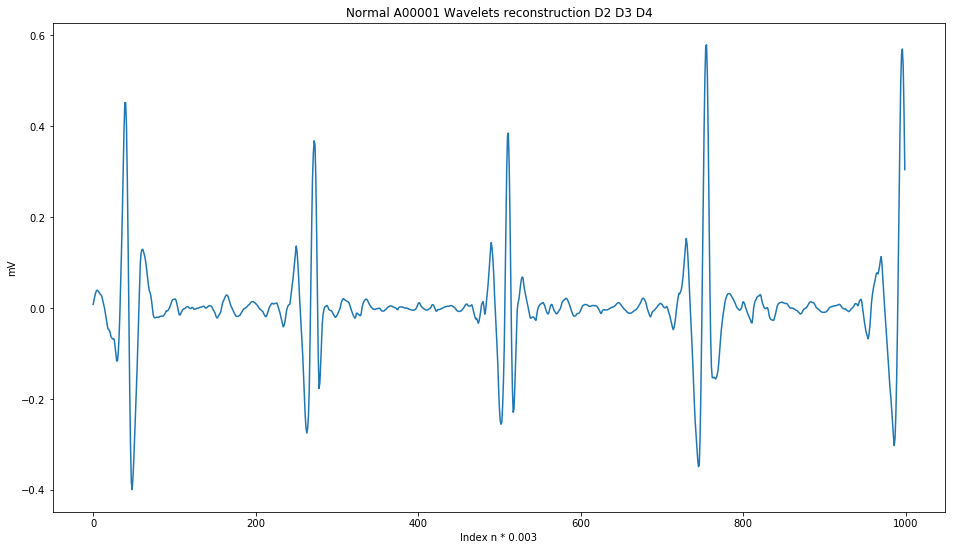

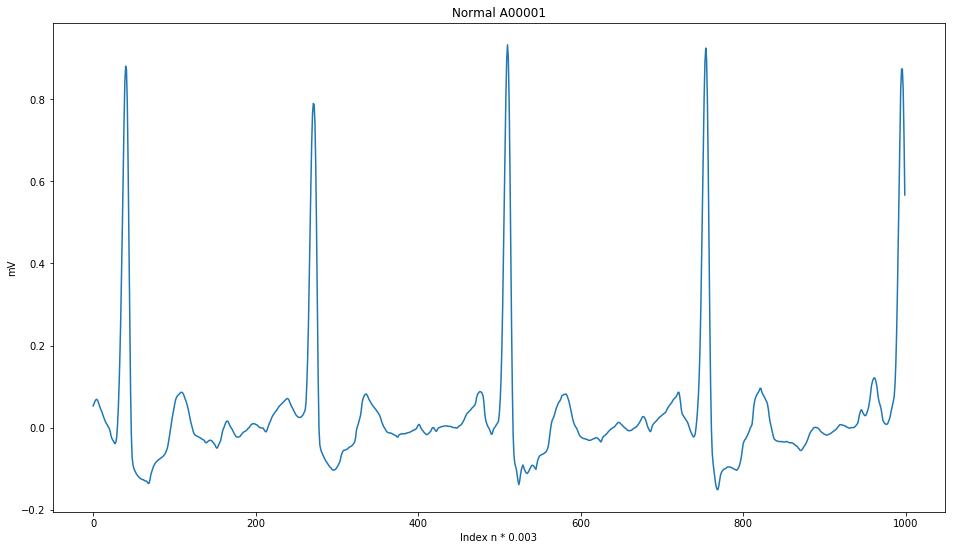

In [14]:
#plot reconstructed signal
wave.plotWave(rebuilt_n[1000:2000], 'Normal A00001 Wavelets reconstruction D2 D3 D4', 'Index n * 0.003')
#plot original signal
wave.plotWave(ecg_n1[1000:2000], 'Normal A00001', 'Index n * 0.003')

# Wavelet applying thresholding on Coefficients

In [15]:
#wavelet decon on a Normal EKG
coeff_n2 = pywt.wavedecn(ecg_n1, 'sym4', mode='symmetric', level=5)
print (coeff_n2)

[array([ -8.72234893e-01,  -8.12184825e-01,  -1.21523887e+00,
        -1.25593680e+00,  -1.44936210e+00,  -7.45636080e-01,
         1.76968898e-01,  -1.16687741e+00,   3.03304341e-01,
         7.64150357e-02,   5.37538019e-01,   7.86194485e-01,
         1.80292297e+00,   1.36352574e+00,   9.98564211e-01,
        -3.19748526e-01,  -2.52956232e+00,  -3.37028432e+00,
        -1.27087319e+00,   7.52807129e-01,  -6.57359576e-01,
         4.24627638e-01,   9.44426096e-01,   5.36010431e-01,
         6.08224109e-01,   5.54221999e-01,   7.38674955e-01,
         1.07474432e+00,  -3.28195366e-01,   3.80845126e-01,
        -6.21797079e-02,   2.26416710e-02,  -2.56180897e-02,
         4.25703674e-02,   1.16498786e+00,  -3.03924308e-01,
         1.61805470e-02,   2.60120614e-02,  -1.37671832e-01,
        -4.62105250e-02,   5.47438692e-02,   9.44498398e-01,
         3.51468833e-01,  -1.91282832e-01,   2.15783263e-01,
        -9.89230435e-02,  -3.12806424e-02,   5.97623083e-02,
         1.26497723e-01

In [16]:
#Using soft filter
coeff_n2[0] = pywt.threshold(coeff_n2[0], 10)
coeff_n2[1]['d'] = pywt.threshold(coeff_n2[0], 4)
#coeff_n[2]['d'].fill(0)
#coeff_n[3]['d'].fill(0)
#coeff_n[4]['d'].fill(0)

In [17]:
rebuilt_n2 = pywt.waverecn(coeff_n2, 'sym4')

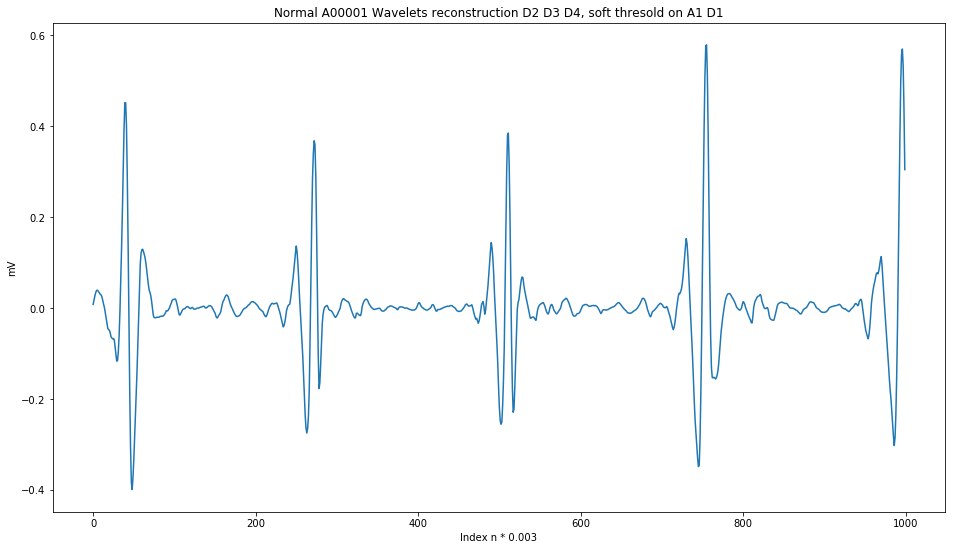

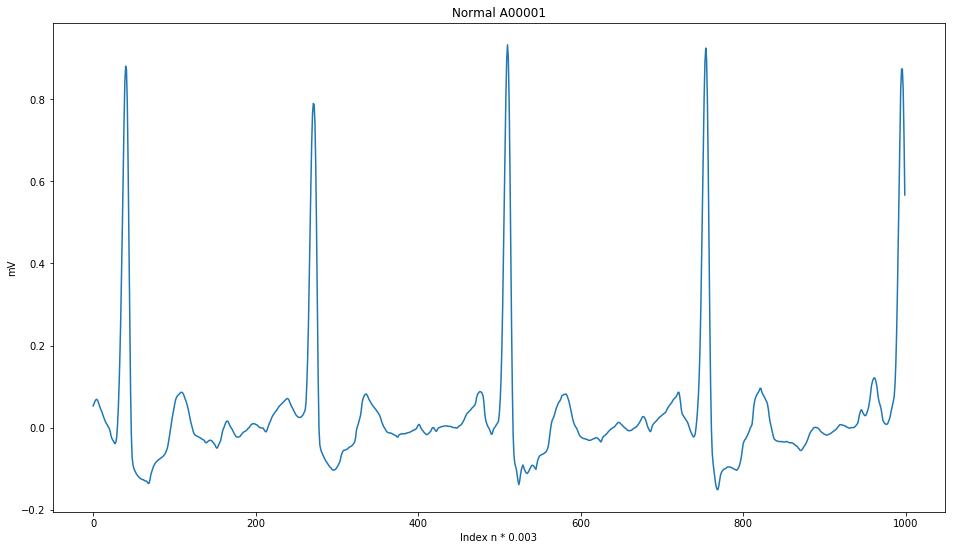

In [18]:
#plot reconstructed signal
wave.plotWave(rebuilt_n2[1000:2000], 'Normal A00001 Wavelets reconstruction D2 D3 D4, soft thresold on A1 D1', 'Index n * 0.003')
#plot original signal
wave.plotWave(ecg_n1[1000:2000], 'Normal A00001', 'Index n * 0.003')

# Compare residual values of noisy ECGs and normal

### 1. Calculate residuals of the rebuilt and original, comparing one normal and one noisy ECG

In [52]:
rebuilt_normal = wave.waveletDecomp(ecg_n1, 'sym4', levels=5, mode='symmetric', omissions=([1],False))
rebuilt_noisy = wave.waveletDecomp(ecg_ns1, 'sym4', levels=5, mode='symmetric', omissions=([1],False))

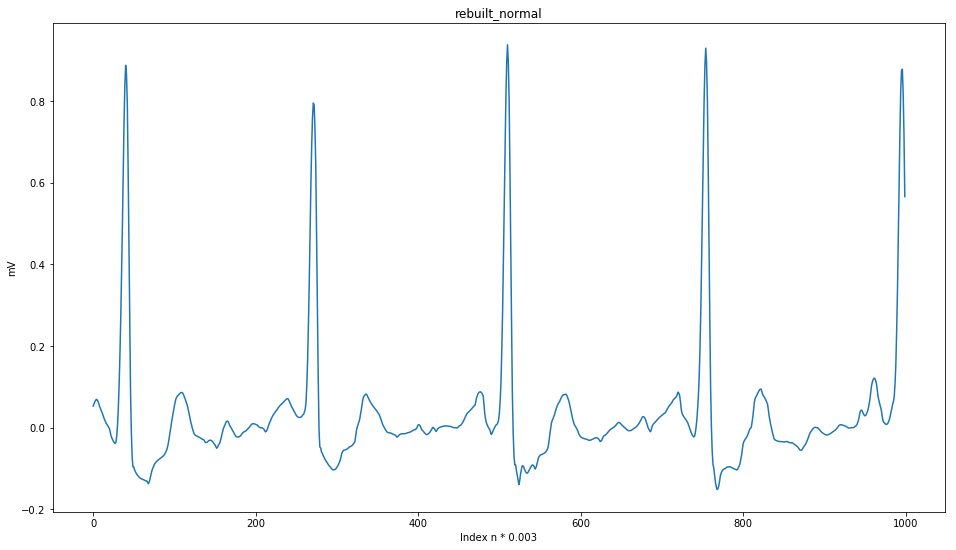

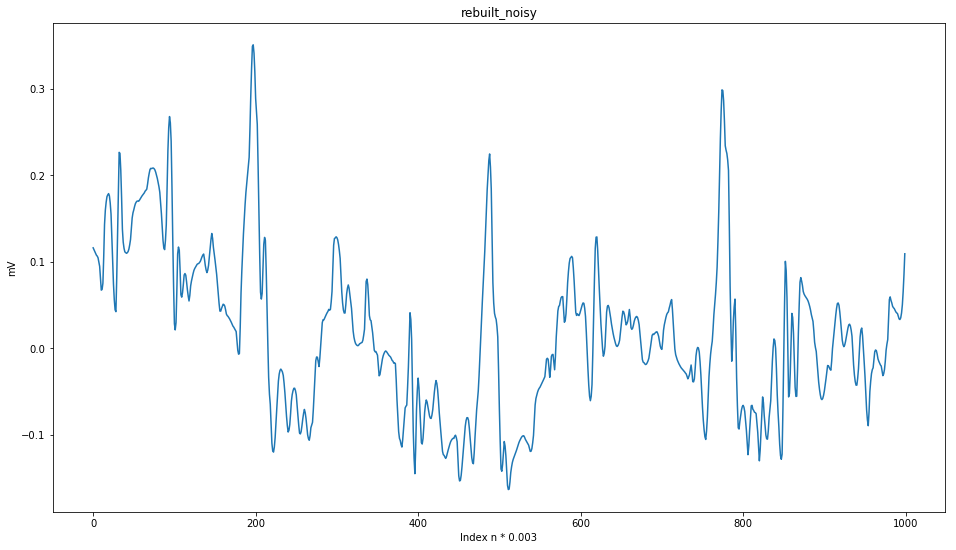

In [53]:
wave.plotWave(rebuilt_normal[1000:2000], "rebuilt_normal", "Index n * 0.003")
wave.plotWave(rebuilt_noisy[1000:2000], "rebuilt_noisy", "Index n * 0.003")

normal:0.0871430684085
nosiy:0.0712091599468


<Container object of 2 artists>

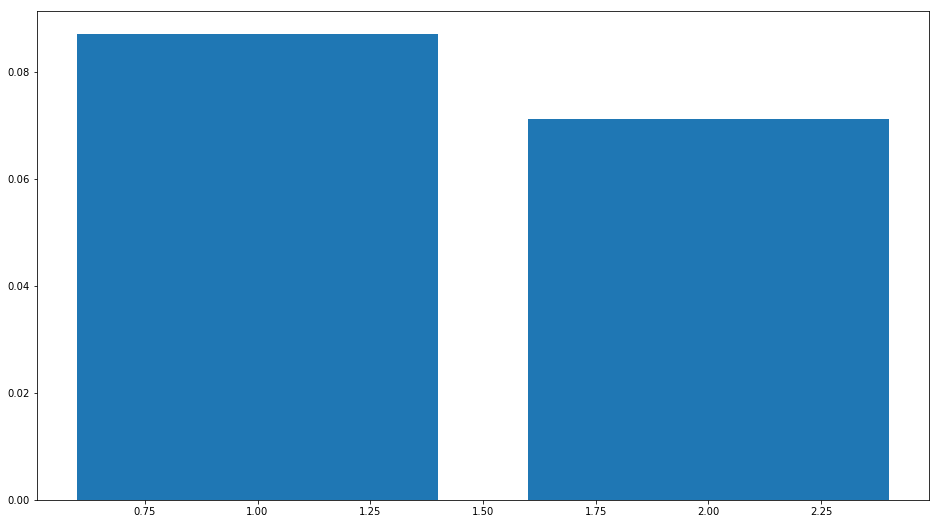

In [21]:
#calculate residuals
residual_normal = sum(abs(rebuilt_normal-ecg_n1))/len(ecg_n1)
residual_noisy = sum(abs(rebuilt_noisy-ecg_ns1))/len(ecg_ns1)
print ('normal:'+str(residual_normal))
print ('nosiy:'+str(residual_noisy))
plt.bar([1,2],[residual_normal, residual_noisy])

### 2. Calculate all residuals of noisy ECGs and compare with the residuals of normal ECGs

In [47]:
# helper function
def calculate_residuals(original, wavelets, levels, mode='symmetric', omissions=([],True)):
    rebuilt = wave.waveletDecomp(original, wavelets, levels, mode, omissions)
    residual = sum(abs(original-rebuilt[:len(original)]))/len(original)
    return residual

def all_residuals(records, wavelets='sym4', levels=3, mode='symmetric', omissions=([1],False), path = '../Physionet_Challenge/training2017/'):
    residual_list = []
    file = open(path+records, 'r')
    while (True):
        newline = file.readline().rstrip('\n')
        if newline == '':
            break
        data = util.load(newline)
        residuals = calculate_residuals(data, wavelets, levels, mode, omissions)
        residual_list.append(residuals)
    file.close()
    return residual_list
    

In [48]:
normal_residuals = all_residuals('RECORDS_N')
AF_residuals = all_residuals('RECORDS_A')
Others_residuals = all_residuals('RECORDS_O')
noisy_residuals = all_residuals('RECORDS_Noise')

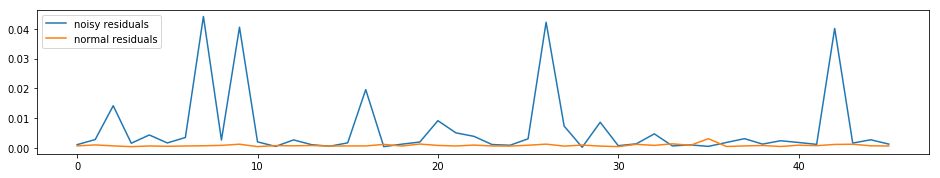

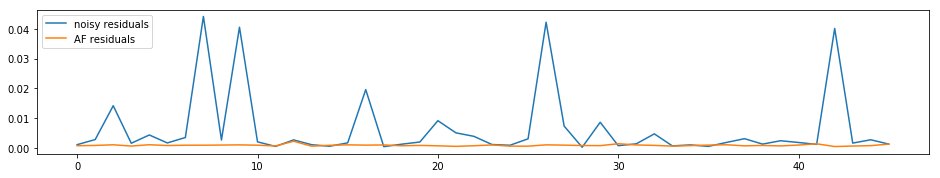

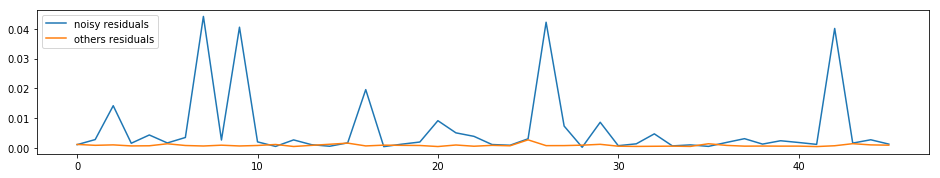

In [49]:
plt_data = [noisy_residuals, normal_residuals[:46], AF_residuals[:46], Others_residuals[:46]]
graph_names = ['noisy residuals', 'normal residuals', 'AF_residuals', 'others_residuals']
plt.subplot(3,1,1)
util.multiplot([noisy_residuals, normal_residuals[0:46]], ['noisy residuals', 'normal residuals'])
plt.subplot(3,1,2)
util.multiplot([noisy_residuals, AF_residuals[0:46]], ['noisy residuals', 'AF residuals'])
plt.subplot(3,1,3)
util.multiplot([noisy_residuals, Others_residuals[0:46]], ['noisy residuals', 'others residuals'])

noisy residual mean:0.00639545909688
normal residual mean:0.000773886289257


<Container object of 2 artists>

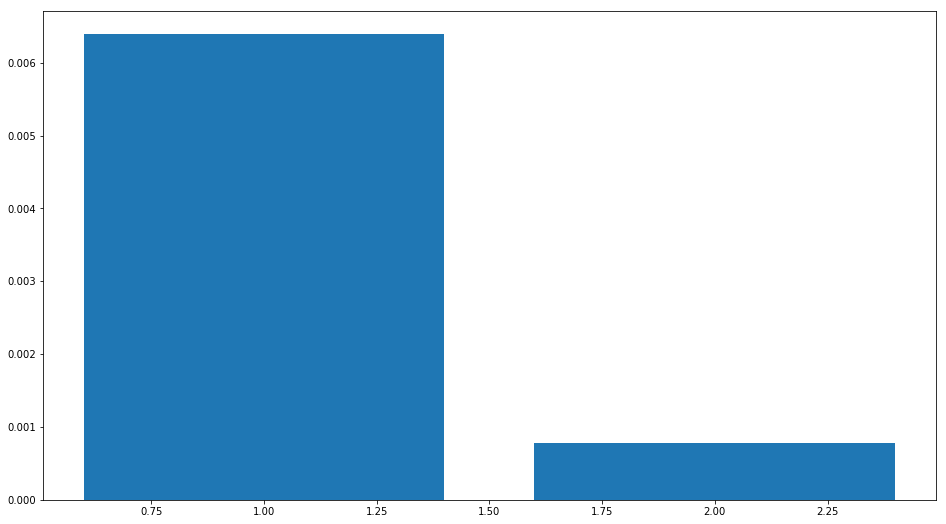

In [50]:
mean_residual_noisy = np.mean(noisy_residuals)
mean_residual_normal = np.mean(normal_residuals)
print ('noisy residual mean:' + str(mean_residual_noisy))
print ('normal residual mean:' + str(mean_residual_normal))
plt.bar([1,2], [mean_residual_noisy, mean_residual_normal])

noisy residual variance:0.000132341313841
normal residual variance:2.321385194e-07


<Container object of 2 artists>

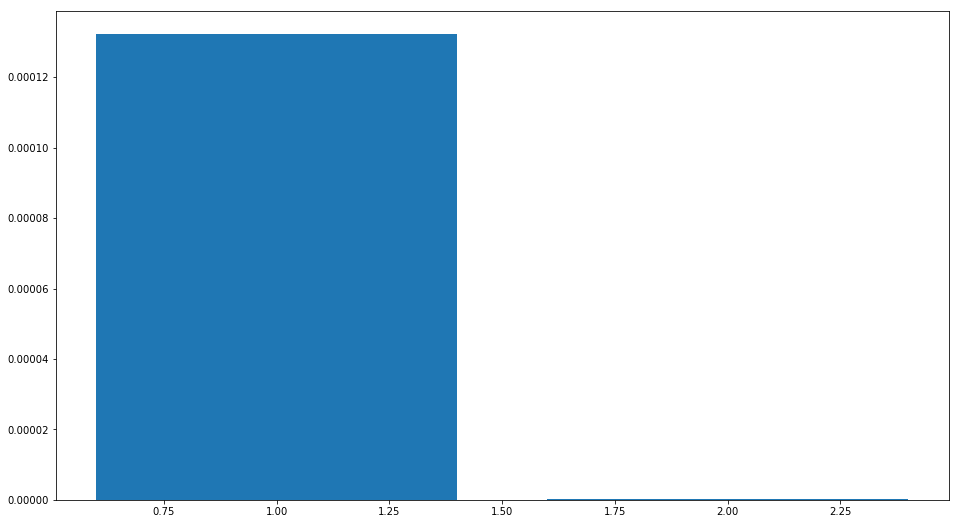

In [51]:
var_residual_noisy = np.var(noisy_residuals)
var_residual_normal = np.var(normal_residuals)
print ('noisy residual variance:' + str(var_residual_noisy))
print ('normal residual variance:' + str(var_residual_normal))
plt.bar([1,2], [var_residual_noisy, var_residual_normal])

### reconstruct only cA and cD5